In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('house_price.csv')

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: ylabel='price_per_sqft'>

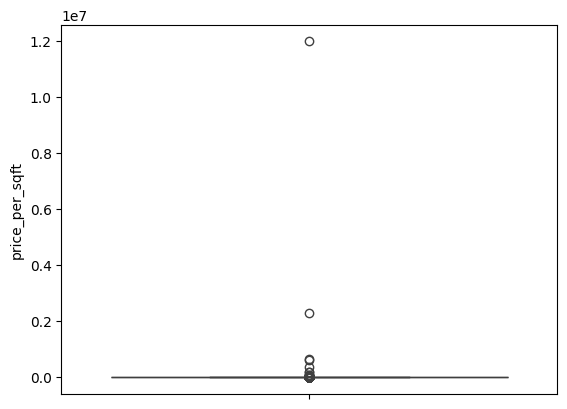

In [12]:
#plot box plot to see outliers clearly

sns.boxplot(df['price_per_sqft'])

In [ ]:
#Remove outlier using mean()

In [10]:
mean=df['price_per_sqft'].mean()
std_dev=df['price_per_sqft'].std()
threshold=3
df = df[(df['price_per_sqft'] >= mean - threshold * std_dev) & (df['price_per_sqft'] <= mean + threshold * std_dev)]


<Axes: ylabel='price_per_sqft'>

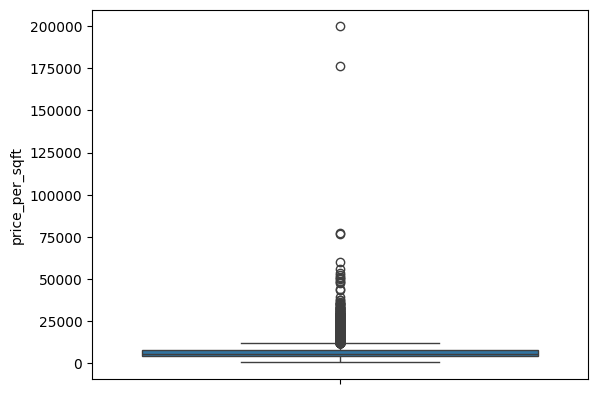

In [11]:
sns.boxplot(df['price_per_sqft'])

In [12]:
#Remove outliers using percentile method
upper_limit=df['price_per_sqft'].quantile(0.99)
lower_limit=df['price_per_sqft'].quantile(0.01)
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 23333.0
lower_limit 2549.0


<Axes: ylabel='price_per_sqft'>

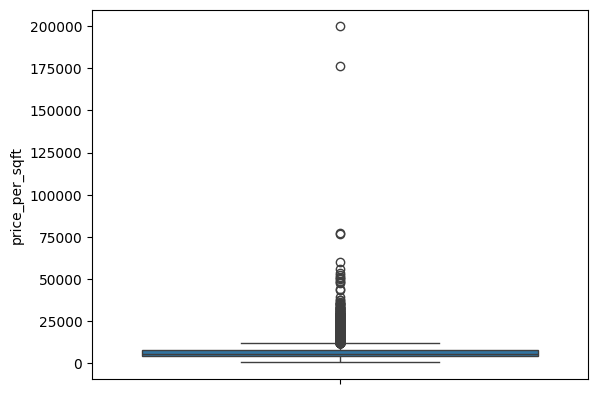

In [13]:
sns.boxplot(df['price_per_sqft'])

In [14]:
#find outliers
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [17]:
#trimming- remove outlier data
new_df=df.loc[(df['price_per_sqft']<=upper_limit)&(df['price_per_sqft']>=lower_limit)]
print("before removing outliers",len(df))
print("after removing outliers",len(new_df))
print("outliers",len(df)-len(new_df))

before removing outliers 13195
after removing outliers 12937
outliers 258


<Axes: ylabel='price_per_sqft'>

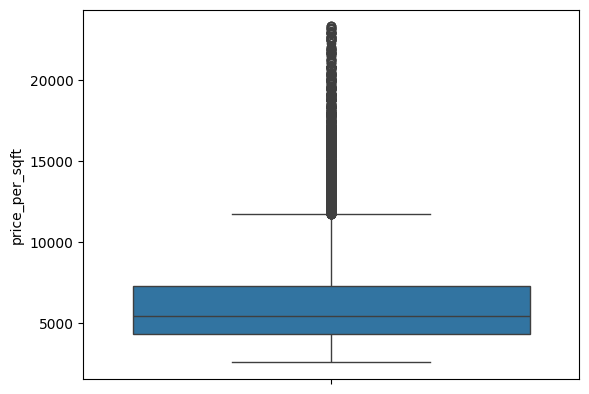

In [18]:
sns.boxplot(new_df['price_per_sqft'])

In [19]:
#capping
new_df=df.copy()
new_df.loc[(df['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit
new_df.loc[(df['price_per_sqft']<lower_limit,'price_per_sqft')]=lower_limit

<Axes: ylabel='price_per_sqft'>

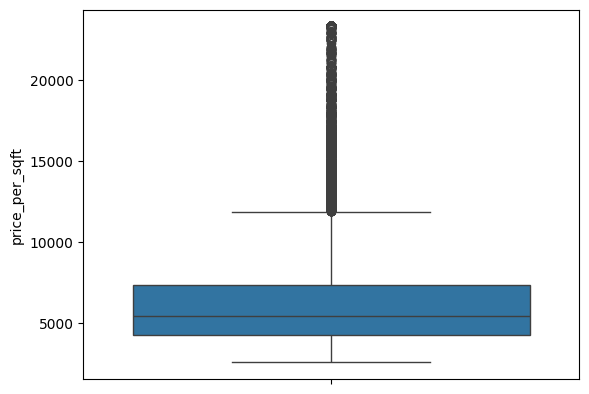

In [20]:
sns.boxplot(new_df['price_per_sqft'])

In [22]:
#Remove outliers using IQR method
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr=q3-q1

In [23]:
q1,q3,iqr

(4266.5, 7313.0, 3046.5)

In [24]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(11882.75, -303.25)

<Axes: ylabel='price_per_sqft'>

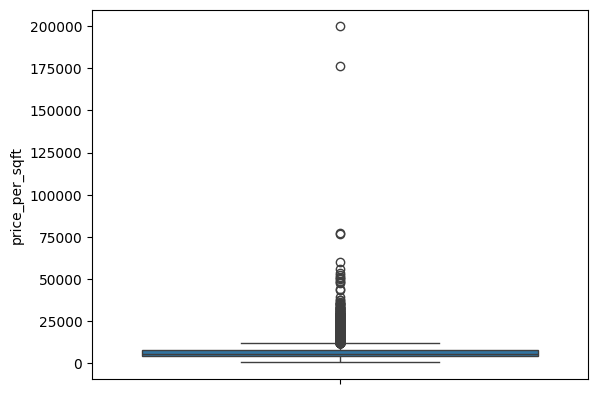

In [25]:
sns.boxplot(df['price_per_sqft'])

In [26]:
#find outliers
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [27]:
#trimming- remove outlier data
new_df=df.loc[(df['price_per_sqft']<=upper_limit)&(df['price_per_sqft']>=lower_limit)]
print("before removing outliers",len(df))
print("after removing outliers",len(new_df))
print("outliers",len(df)-len(new_df))

before removing outliers 13195
after removing outliers 11935
outliers 1260


<Axes: ylabel='price_per_sqft'>

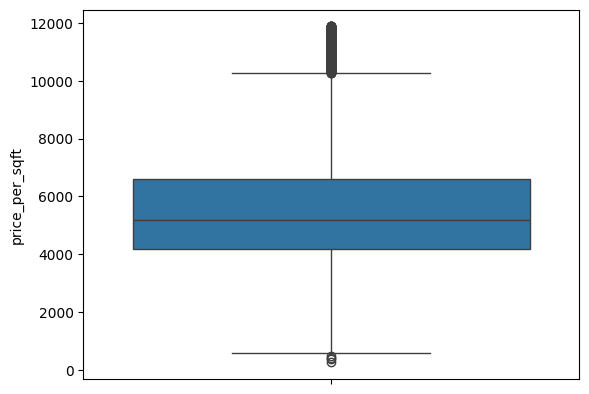

In [28]:
sns.boxplot(new_df['price_per_sqft'])

In [29]:
#capping
new_df=df.copy()
new_df.loc[(df['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit
new_df.loc[(df['price_per_sqft']<lower_limit,'price_per_sqft')]=lower_limit

C:\Users\Noufiya\AppData\Local\Temp\ipykernel_6944\3149609582.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '11882.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(df['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit


<Axes: ylabel='price_per_sqft'>

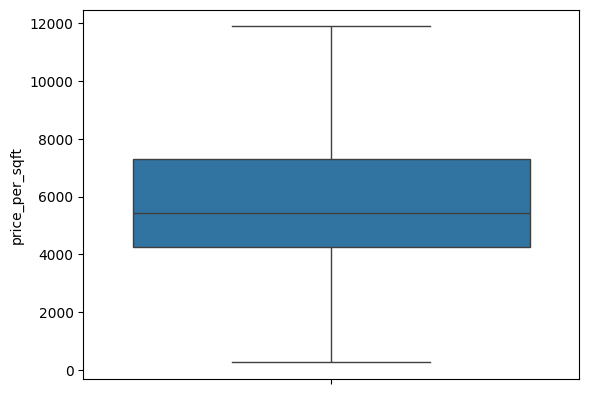

In [30]:
sns.boxplot(new_df['price_per_sqft'])

In [31]:
#z-score method
upper_limit=df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_limit=df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 21343.89175670499
lower_limit -7916.474553218821


In [32]:
#find outliers
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
475,other,4 BHK,1150.0,4.0,260.0,4,22608
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [33]:
#trimming- remove outlier data
new_df=df.loc[(df['price_per_sqft']<=upper_limit)&(df['price_per_sqft']>=lower_limit)]
print("before removing outliers",len(df))
print("after removing outliers",len(new_df))
print("outliers",len(df)-len(new_df))

before removing outliers 13195
after removing outliers 13012
outliers 183


<Axes: ylabel='price_per_sqft'>

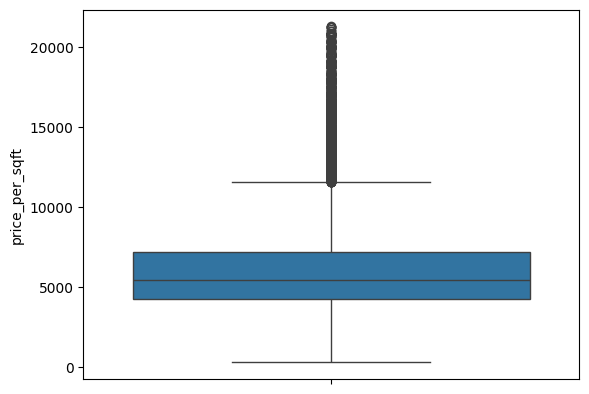

In [34]:
sns.boxplot(new_df['price_per_sqft'])

In [35]:
#capping
new_df=df.copy()
new_df.loc[(df['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit
new_df.loc[(df['price_per_sqft']<lower_limit,'price_per_sqft')]=lower_limit

C:\Users\Noufiya\AppData\Local\Temp\ipykernel_6944\3149609582.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '21343.89175670499' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(df['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit


<Axes: ylabel='price_per_sqft'>

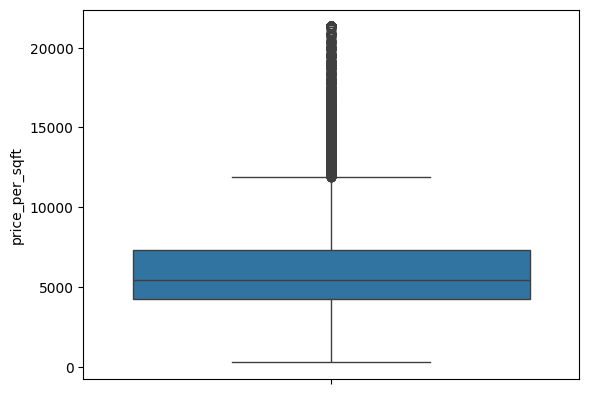

In [36]:
sns.boxplot(new_df['price_per_sqft'])

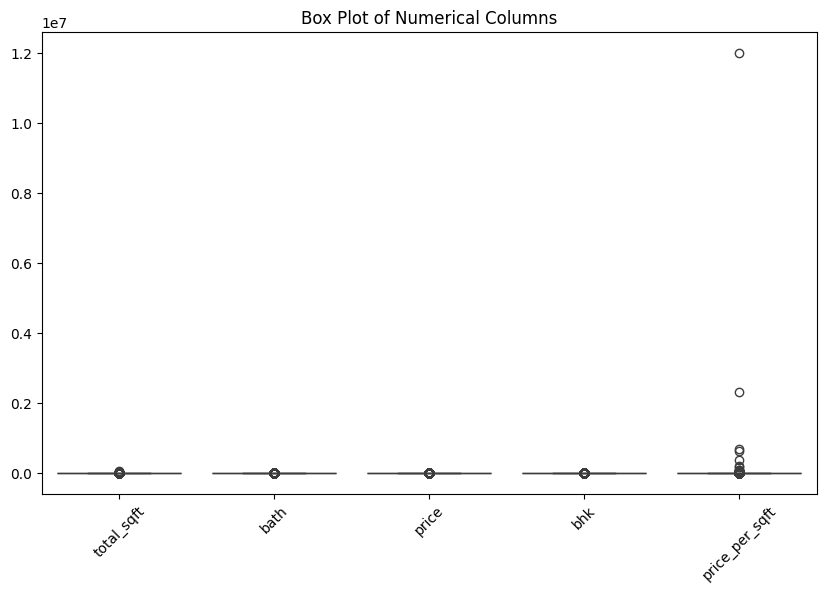

In [5]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

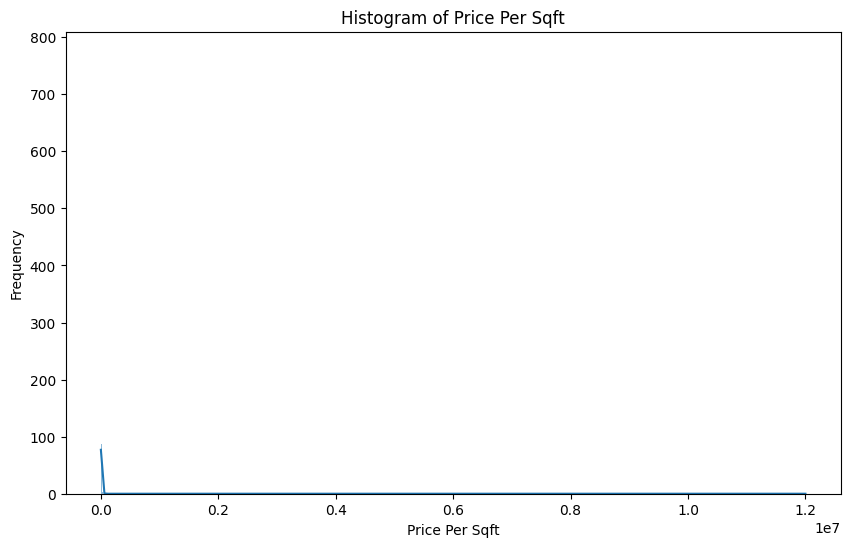

In [7]:
#histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df['price_per_sqft'], kde=True)
plt.title("Histogram of Price Per Sqft")
plt.xlabel("Price_Per_Sqft")
plt.ylabel("Frequency")
plt.show()